# Exercise 1

## Part 1

In [94]:
statement = "The value of pi is approximately 333 divided by 106"

numerator = float(statement[32:36])
denominator = float(statement[47:51])

pi = numerator/denominator

print(pi)


3.141509433962264


## Part 2

The shape of the image is (338, 600, 3)
The RGB values for the pixel in the top left are [0.         0.22352941 0.39607844]


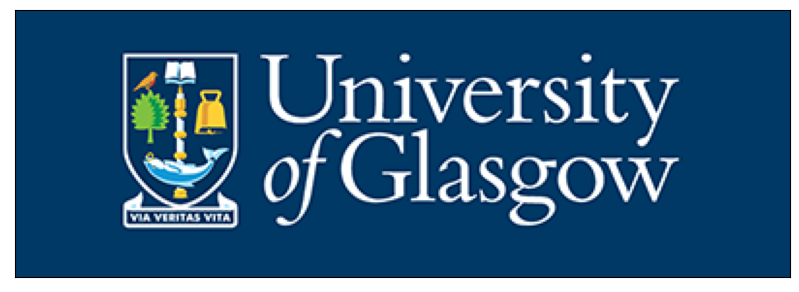

In [95]:
import matplotlib.pyplot as plt

rgb_img = plt.imread("patterns/glasgow_rgb.png")

print("The shape of the image is", rgb_img.shape)
print("The RGB values for the pixel in the top left are", str(rgb_img[0,0]))
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)
plt.ylim(238,100)
plt.xlim(100,500)
plt.xticks([])
plt.yticks([])

plt.show()

## Computing Task

In [96]:
import re
import matplotlib.pyplot as plt
import numpy as np
import os

path = "patterns/"

files = os.listdir("patterns/")

for file in files:
    if file.startswith("hidden"):
        print(file)
        os.rename(path+file, path+'group_1/'+file)

for file in files:
    if re.search("hidden", file):
        print(file)
        os.rename("patterns/"+file, path+"group_2/"+file)

dict_keys(['hidden_6370.png', 'hidden_2503.png', 'hidden_7342.png', 'hidden_1503.png', 'hidden_8250.png', 'hidden_4119.png', 'hidden_8169.png', 'hidden_5276.png', 'hidden_0905.png', 'hidden_5703.png'])


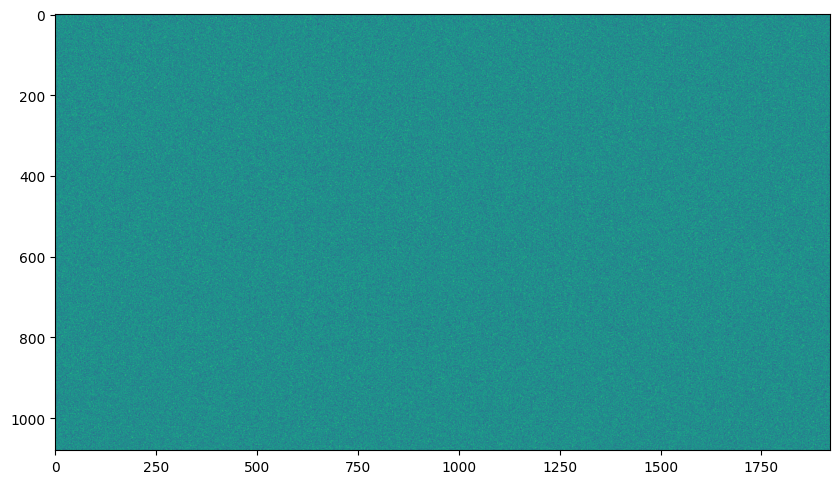

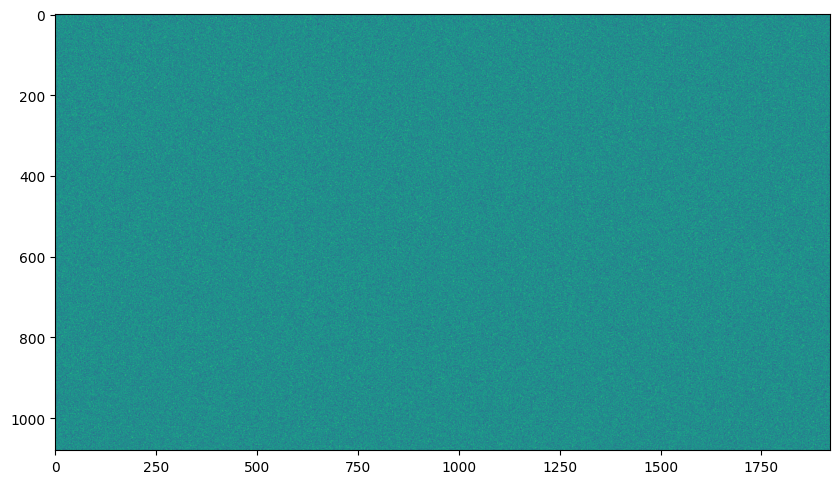

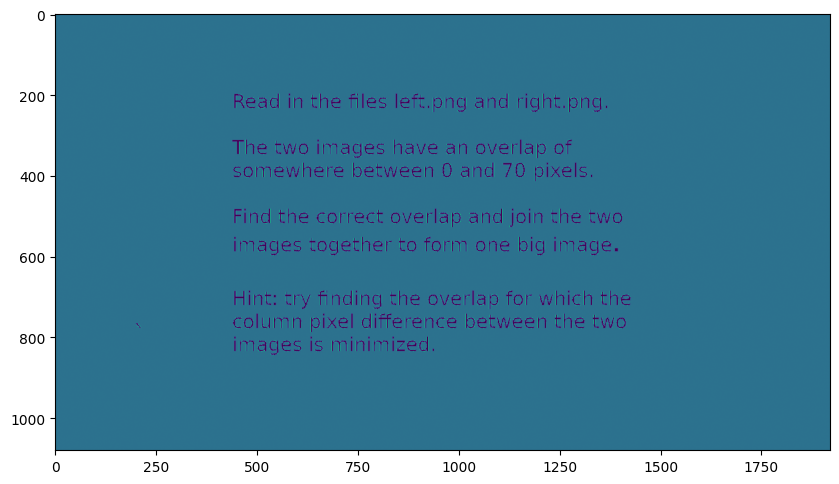

In [97]:
group_1 = os.listdir(path+"group_1/")
group_2 = os.listdir(path+"group_2/")

dic_g1 = {}
dic_g2 = {}
for i in np.arange(len(group_1)):
    dic_g1[group_1[i]] = plt.imread(path+"group_1/"+group_1[i])

for i in np.arange(len(group_2)):
    dic_g2[group_2[i]] = plt.imread(path+"group_2/"+group_2[i])

print(dic_g1.keys())
img_g1 = (np.zeros((1080,1920)))
img_g2 = (np.zeros((1080,1920)))

for i in np.arange(len(dic_g1)):
    img_g1 = dic_g1[group_1[i]]+img_g1
    
plt.figure(figsize=(10,10))
plt.imshow(img_g1)
plt.show()

for i in np.arange(len(dic_g2)):
    img_g2 = dic_g2[group_2[i]]+img_g2
    
plt.figure(figsize=(10,10))
plt.imshow(img_g2)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(img_g1-img_g2)
plt.show()

# g1_full = []
# g2_full = []

# for i in np.arange(len(group_1)):
#     g1 = plt.imread(path+"group_1/"+group_1[i])
#     g1_full.append(g1)
    
# for i in np.arange(len(group_2)):
#     g2 = plt.imread(path+"group_2/"+group_2[i])
#     g2_full.append(g2)

# print((g1_full))

# g1_full = np.array(g1_full)
# g2_full = np.array(g2_full)

# print((g1_full.shape))

# g1_img = sum(g1_full)
# g2_img = sum(g2_full)

# print(g1_img.shape)
# print(g2_img.shape)

# plt.figure(figsize=(10,10))
# plt.imshow(g2_img-g1_img)
# plt.show()


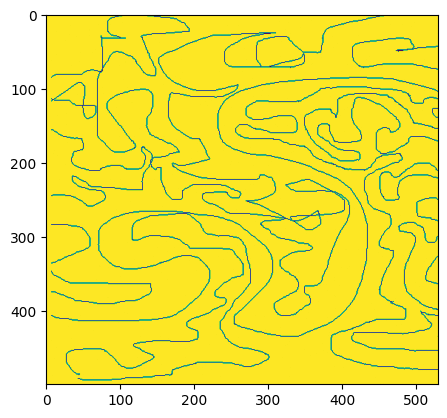

In [189]:
left = plt.imread("patterns/left.png")
right = plt.imread("patterns/right.png")

left = left[::-1]
plt.imshow(left)

In [190]:
from PIL import Image

im1 = Image.open('patterns/left.png')
im2 = Image.open('patterns/right.png')

<function matplotlib.pyplot.show(close=None, block=None)>

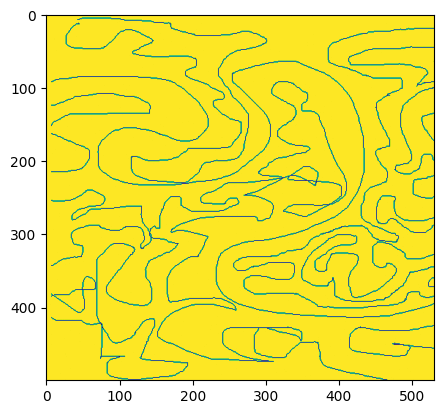

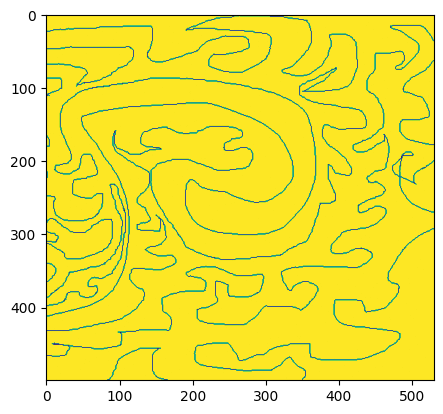

In [204]:
image_1 = (plt.imread('patterns/left.png'))
image_2 = (plt.imread('patterns/right.png'))
plt.figure(figsize=(5,5))
plt.imshow(image_1)
plt.show
plt.figure(figsize=(5,5))
plt.imshow(image_2)
plt.show

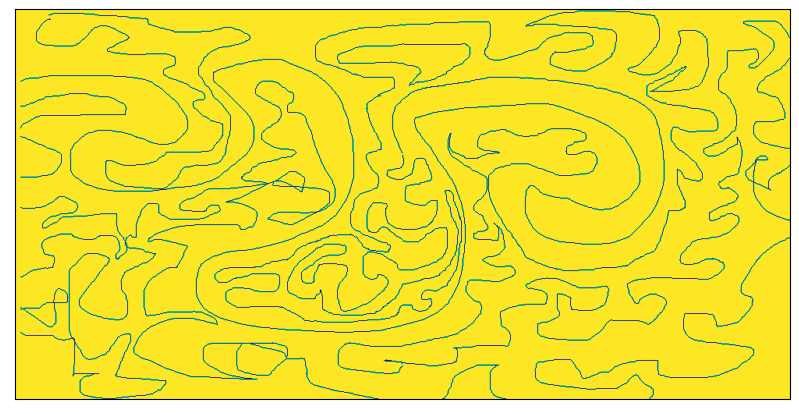

In [224]:

def difference(left, right):
    diffren = left -right
    return  abs(sum(diffren))

diffr =[]
for i in np.arange(0,70,1):
    diff = difference(image_1[:,-i],image_2[:,i])
    diffr.append(diff)



left_img = image_1[:,:(image_1.shape[1]-np.argmin(diffr))]
right_img = image_2[:,np.argmin(diffr):]

final_img = np.concatenate((left_img,right_img),axis=1)

plt.figure(figsize=(10,10))
plt.imshow(final_img)
plt.xticks([])
plt.yticks([])
plt.show()
